## Need to plot using ggplot because plotnine has a bug for what I want to do :c

In [7]:
library(ggplot2)
mytheme <- theme_minimal() + theme(axis.text = element_text(color = "black"),
                                 axis.ticks = element_line(linewidth = 0.2), 
                                 axis.title = element_text(size=7*0.35, vjust = -0.5),
                                 legend.title = element_text(size = 7*0.35, face = "bold"),
                                 legend.margin = margin(r = 0, l = 0, t = 0, b = 0),
                                 legend.box.margin = margin(-10, 3, -10, -7),
                                 legend.key.size = unit(0.2, "cm"),
                                 panel.border	= element_blank(),
                                 axis.line.x = element_line(linewidth = 0.2),
                                 axis.line.y = element_line(linewidth = 0.2), 
                                 panel.background = element_blank(),   
                                 panel.grid = element_line(linewidth =0.2),
                                 plot.margin = margin(t = 10, r = 10, b = 10, l = 10),
                                 plot.title = element_text(face="bold", hjust=0.5),
                                 strip.text = element_text(size=7*0.35, face="bold"),   
                                 strip.background = element_blank(),
                                 text = element_text(family = "Helvetica",color="black", size=7*0.35))

In [17]:
library(readr)
stat_melted = read_tsv("spliced_sirv_performance_df.tsv")

unique_pairs <- unique(stat_melted[, c("population", "pop_color")])
pop_c_dict <- setNames(as.character(unique_pairs$pop_color),
                       unique_pairs$population)
pop_c_dict

New names:
• `` -> `...1`
Rows: 2064 Columns: 18
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (8): lab_sample, filter_set, assc_gene_2, gene_id, population, stat_typ...
dbl (10): ...1, n_tp, n_fp, n_transcripts, n_monoexonic_transcripts, n_fn, s...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ITU       PEL       HAC       AJI       LWK       YRI       CEU       MPC 
"#db72f2" "#ff3a33" "#4cb33e" "#46bff0" "#A09136" "#DFBD00" "#347eed" "#eb9d0c"

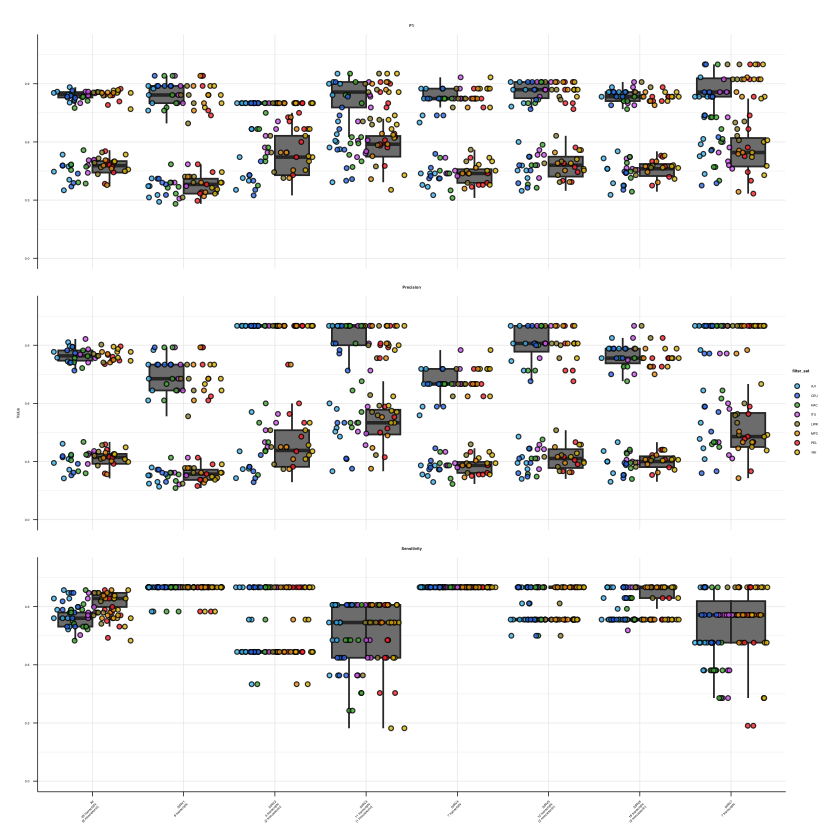

In [22]:
library(ggplot2)

ggplot(stat_melted, aes(x = assc_gene_title, y = stat_val, fill=filter_set)) +
  geom_boxplot(aes(fill=filter_set),
               outlier.shape = NA,
               position = position_dodge(width = 0.75)) +
  geom_point(aes(fill=population),
             shape = 21,
             size = 1, alpha = 0.8,
             position = position_jitterdodge(jitter.width = 0.2,
                                             dodge.width = 0.75)) +
  facet_wrap(~ stat_type, nrow = 3) +
  scale_fill_manual(values = pop_c_dict) +
  # scale_color_manual(values = pop_c_dict) +
  mytheme +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = NULL, y = "Value") +
  coord_cartesian(ylim = c(0.0, 1.1))
